In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
games_df = pd.read_csv('games_df.zip',compression = 'zip')
games_df.head()

,White_Elo,Black_Elo,Result,Opening,Variation,Time_Control,Increment,Evaluation,Players_Clock,Termination,...,Black_Open_Time,White_last_10_moves,Black_last_10_moves,White_Time_Scramble,Black_Time_Scramble,White_Eval,Black_Eval,White_Open_Eval,Black_Open_Eval,Average_Elo
0,1791,1829,1-0,Queen's Gambit Refused,Marshall Defense,Bullet,2.0,"['0.25', '0.25', '0.26', '0.78', '-0.08', '0.4...","['0:03:00', '0:03:00', '0:03:01', '0:03:02', '...",Resignation,...,0.00,5.0,5.8,0,0,-14.24,-128.51,0.26,-0.52,1810.0
1,2120,2104,1-0,Sicilian Defense,"Smith-Morra Gambit Accepted, Paulsen Formation",Blitz,0.0,"['0.24', '0.2', '0.21', '0.47', '0.22', '0.09'...","['0:05:00', '0:05:00', '0:04:59', '0:04:59', '...",Checkmate,...,0.75,4.6,3.2,0,0,-18.43,-171.50,-0.52,-0.35,2112.0
2,1457,1521,1-0,Sicilian Defense,Old Sicilian,Rapid,0.0,"['0.24', '0.2', '0.21', '0.08', '0.0', '0.0', ...","['0:10:00', '0:10:00', '0:09:59', '0:09:59', '...",Checkmate,...,1.00,5.0,3.3,0,0,-7.63,-33.84,0.20,-0.67,1489.0
3,2296,2303,1-0,Queen's Pawn Game,London System,Rapid,0.0,"['0.25', '0.22', '0.0', '0.0', '0.0', '0.0', '...","['0:10:00', '0:10:00', '0:09:58', '0:09:57', '...",Resignation,...,1.75,13.0,19.6,0,0,0.65,-95.92,0.03,0.11,2299.5
4,1547,1560,0-1,Queen's Pawn Game,Mason Attack,Rapid,0.0,"['0.25', '0.25', '0.0', '0.37', '0.41', '0.54'...","['0:10:00', '0:10:00', '0:09:58', '0:09:56', '...",Resignation,...,2.25,8.4,4.3,0,0,-228.57,-41.74,-0.19,-0.80,1553.5


In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42820 entries, 0 to 42819
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   White_Elo            42820 non-null  int64  
 1   Black_Elo            42820 non-null  int64  
 2   Result               42820 non-null  object 
 3   Opening              42820 non-null  object 
 4   Variation            29195 non-null  object 
 5   Time_Control         42820 non-null  object 
 6   Increment            42820 non-null  float64
 7   Evaluation           42820 non-null  object 
 8   Players_Clock        42820 non-null  object 
 9   Termination          42820 non-null  object 
 10  Moves                42820 non-null  object 
 11  N_Moves              42820 non-null  int64  
 12  W_Clock              42820 non-null  object 
 13  B_Clock              42820 non-null  object 
 14  W_Clock_DT           42820 non-null  object 
 15  B_Clock_DT           42820 non-null 

In [4]:
games_df[['Increment','White_Time_Scramble','Black_Time_Scramble']]=games_df[['Increment','White_Time_Scramble','Black_Time_Scramble']].astype('object')

In [5]:
games_df.describe()

,White_Elo,Black_Elo,N_Moves,Open_N_Moves,White_Open_Time,Black_Open_Time,White_last_10_moves,Black_last_10_moves,White_Eval,Black_Eval,White_Open_Eval,Black_Open_Eval,Average_Elo
count,42820.000000,42820.000000,42820.000000,42820.000000,42820.000000,42820.000000,42820.000000,42820.000000,42820.000000,42820.000000,42820.000000,42820.000000,42820.000000
mean,1587.618846,1588.070551,31.221298,3.249580,1.853906,2.245819,8.116974,8.174625,-55.762489,-60.167832,-0.309458,-0.761581,1587.844699
std,335.819380,335.226241,12.470893,1.141517,2.988137,3.936678,8.872804,8.912891,85.248716,85.646169,0.933971,1.199884,329.154136
min,600.000000,600.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1656.850000,-1359.620000,-57.620000,-40.270000,630.500000
25%,1341.000000,1339.750000,23.000000,3.000000,0.500000,0.500000,2.600000,2.600000,-64.412500,-71.350000,-0.500000,-0.960000,1344.500000
50%,1577.000000,1579.000000,29.000000,4.000000,1.000000,1.250000,5.600000,5.600000,-28.650000,-31.740000,-0.110000,-0.480000,1579.500000
75%,1820.000000,1821.000000,37.000000,4.000000,2.000000,2.666667,10.300000,10.400000,-12.600000,-14.610000,0.160000,-0.190000,1818.125000
max,2882.000000,2873.000000,131.000000,9.000000,140.750000,262.500000,229.900000,342.100000,263.260000,229.030000,2.730000,0.880000,2816.000000


In [6]:
#Lista das variáveis númericas e a variavel dependente Elo médio 
num_features = games_df.describe().columns.to_list()[2:]

<AxesSubplot:>

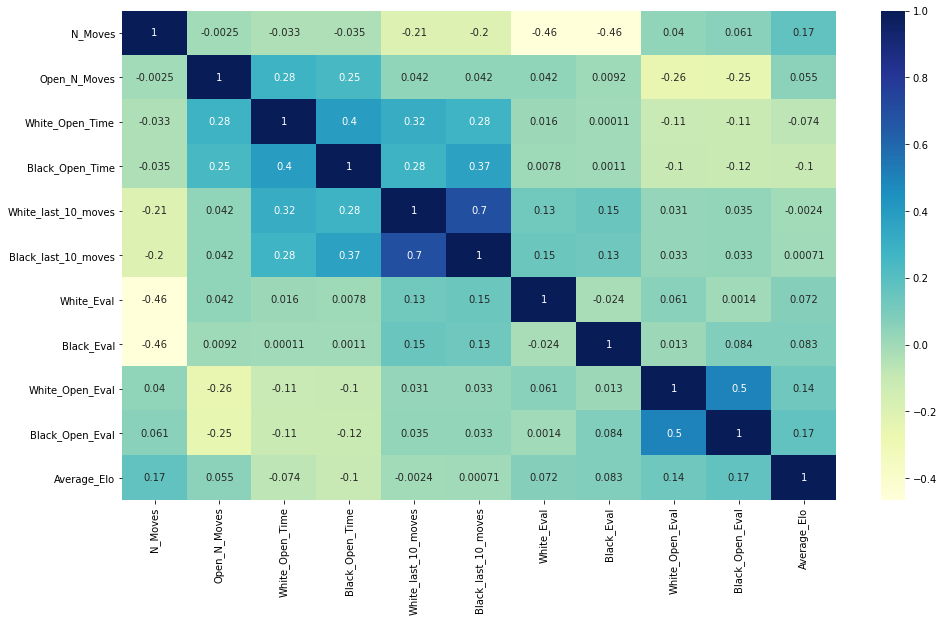

In [7]:
plt.figure(figsize=(16,9))
corr = games_df[num_features].corr()
sns.heatmap(corr,cmap='YlGnBu', annot=True)

As correlações mais altas são, em sua maioria, realcionadas ao tempo gast o entre os dois oponentes in dicando qeu jogadores tem uma têncencia de igualar seu ritimo de jog oao do openente. Também tem alta correlação a avaliação das jogadas de abertura entre as daus cores e entre as avaliação das cores e quatidade de movimentos, esta última negativa.

In [8]:
games_df['Time_Control'].value_counts(normalize=True)

Bullet       0.416838
Blitz        0.242597
Rapid        0.199066
Classical    0.141499
Name: Time_Control, dtype: float64

Bullet é o time control mais representado nos dados, qusae 1,7x maior que o segundo, blitz. Na verdade é possível observar que a frequência é proporcoinal aoauão rápido o time control é

In [9]:
box =alt.Chart(games_df).mark_boxplot(size =35).encode(
x=alt.X('Time_Control:N',sort = ['Bullet','Blitz','Rapid','Classical']),
y='Average_Elo:Q',
color = 'Time_Control').properties(
height = 300,
width =300)

hist = alt.Chart(games_df).mark_area(
    opacity =0.3,interpolate='step').encode(
    alt.X('Average_Elo:Q',bin =alt.Bin(maxbins=100)),
    alt.Y('count()',stack=None),
    color = 'Time_Control').properties(
    height=300,
    width=300)

box|hist


alt.HConcatChart(...)

As distibuições são muito similares, com Bullet tendo uma população com elos maiores

In [10]:
box =alt.Chart(games_df).mark_boxplot(size =35).encode(
x=alt.X('Time_Control:N',sort = ['Bullet','Blitz','Rapid','Classical']),
y='N_Moves:Q',
color = 'Time_Control').properties(
height = 300,
width =300)

hist = alt.Chart(games_df).mark_area(
    opacity =0.3,interpolate='step').encode(
    alt.X('N_Moves:Q',bin =alt.Bin(maxbins=100)),
    alt.Y('count()',stack=None),
    color = 'Time_Control').properties(
    height=300,
    width=300)

box|hist

alt.HConcatChart(...)

A distribuição de movimentos são muito semelhantes, sugerindo que a velocidade do time control não influencia no qual longo (em número de movimentos) o jogo é. No entanto há vários outliers em todos o time control. Interessante que o jogo com mais movimentos foia tingido no tiem ocntrol mais rápido.

In [11]:
games_df.groupby('Time_Control')[['White_Eval','Black_Eval']].describe()

White_Eval                                                  \
                  count       mean        std      min      25%     50%   
Time_Control                                                              
Blitz           10388.0 -55.259843  89.397506 -1656.85 -62.0825 -27.495   
Bullet          17849.0 -54.984996  77.438629 -1109.20 -65.3900 -30.050   
Classical        6059.0 -55.969741  90.997983 -1287.02 -62.1850 -26.920   
Rapid            8524.0 -57.855782  91.221801 -1133.77 -66.2375 -28.285   

                             Black_Eval                                        \
                 75%     max      count       mean        std      min    25%   
Time_Control                                                                    
Blitz        -11.980  136.88    10388.0 -59.872152  85.945145  -930.57 -69.74   
Bullet       -13.830  263.26    17849.0 -59.997095  81.593018 -1359.62 -72.22   
Classical    -11.175  218.52     6059.0 -60.118797  91.460113 -1128.82 -70.00   
Rapid        -12.040  118.89     8524.0 -60.920541  89.231067  -998.69 -71.98   

                                       
                 50%      75%     max  
Time_Control                           
Blitz        -30.470 -14.0275  121.64  
Bullet       -33.730 -15.9100  162.20  
Classical    -28.400 -12.2700  130.54  
Rapid        -31.575 -13.9475  229.03

Aparentemente o time control não tem grande influencia na performance dos jogadores

In [12]:
games_df.groupby('Time_Control')[['White_Open_Time','Black_Open_Time']].describe()

White_Open_Time                                               \
                       count      mean       std  min       25%       50%   
Time_Control                                                                
Blitz                10388.0  1.736265  1.908231  0.0  0.750000  1.250000   
Bullet               17849.0  0.848535  0.989182  0.0  0.250000  0.666667   
Classical             6059.0  4.286114  5.499557  0.0  1.333333  2.750000   
Rapid                 8524.0  2.373637  3.203881  0.0  1.000000  1.666667   

                               Black_Open_Time                                 \
                   75%     max           count      mean       std  min   25%   
Time_Control                                                                    
Blitz         2.250000   35.00         10388.0  2.086467  2.285216  0.0  0.75   
Bullet        1.000000   20.50         17849.0  0.925823  1.216718  0.0  0.25   
Classical     5.333333  107.00          6059.0  5.441550  7.202813  0.0  1.50   
Rapid         3.000000  140.75          8524.0  2.932470  4.484003  0.0  1.00   

                                      
               50%   75%         max  
Time_Control                          
Blitz         1.50  2.75   36.750000  
Bullet        0.75  1.25   30.666667  
Classical     3.50  7.00  184.250000  
Rapid         2.00  3.75  262.500000

In [13]:
games_df.groupby('Time_Control')[['White_last_10_moves','Black_last_10_moves']].describe()

White_last_10_moves                                              \
                           count       mean        std  min  25%   50%   75%   
Time_Control                                                                   
Blitz                    10388.0   7.674104   4.794438  0.1  4.2   6.7  10.0   
Bullet                   17849.0   3.496788   2.852909  0.0  1.6   2.6   4.7   
Classical                 6059.0  18.947750  15.328991  0.0  8.8  15.0  24.7   
Rapid                     8524.0  10.632524   6.984097  0.0  5.6   9.3  14.0   

                    Black_last_10_moves                                       \
                max               count       mean        std  min       25%   
Time_Control                                                                   
Blitz          39.9             10388.0   7.696350   4.766003  0.0  4.200000   
Bullet         67.4             17849.0   3.547368   2.836693  0.0  1.600000   
Classical     229.9              6059.0  18.928466  15.407678  0.5  8.816667   
Rapid          63.0              8524.0  10.802817   7.182577  0.0  5.600000   

                                      
               50%   75%         max  
Time_Control                          
Blitz          6.7  10.1   46.833333  
Bullet         2.6   4.8   61.100000  
Classical     15.0  24.9  342.100000  
Rapid          9.3  14.3   65.900000

In [14]:
games_df.groupby(['Time_Control','White_Time_Scramble','Black_Time_Scramble'])[['White_Eval']].describe()

White_Eval              \
                                                          count        mean   
Time_Control White_Time_Scramble Black_Time_Scramble                          
Blitz        0                   0                       7786.0  -46.327181   
                                 1                       1048.0  -72.459542   
             1                   0                       1063.0  -80.149774   
                                 1                        491.0 -106.311629   
Bullet       0                   0                       7599.0  -38.959900   
                                 1                       2233.0  -56.526386   
             1                   0                       2283.0  -57.979619   
                                 1                       5734.0  -74.429721   
Classical    0                   0                       5958.0  -55.562808   
                                 1                         49.0  -70.388571   
             1                   0                         46.0  -81.915217   
                                 1                          6.0 -143.385000   
Rapid        0                   0                       7623.0  -53.173604   
                                 1                        389.0  -91.341748   
             1                   0                        414.0  -89.385048   
                                 1                         98.0 -155.948571   

                                                                           \
                                                             std      min   
Time_Control White_Time_Scramble Black_Time_Scramble                        
Blitz        0                   0                     78.228289 -1656.85   
                                 1                    114.055576  -904.14   
             1                   0                     99.196460  -780.95   
                                 1                    131.170584  -888.28   
Bullet       0                   0                     60.139050 -1109.20   
                                 1                     91.005904  -891.26   
             1                   0                     68.942737  -542.66   
                                 1                     89.645991  -837.83   
Classical    0                   0                     90.647544 -1287.02   
                                 1                     88.645204  -475.98   
             1                   0                    121.452990  -560.76   
                                 1                    131.592728  -330.54   
Rapid        0                   0                     85.259414 -1133.77   
                                 1                    124.807554  -722.57   
             1                   0                    101.720023  -727.58   
                                 1                    182.842955  -796.85   

                                                                         \
                                                           25%      50%   
Time_Control White_Time_Scramble Black_Time_Scramble                      
Blitz        0                   0                    -52.0125  -23.215   
                                 1                    -79.0175  -33.350   
             1                   0                    -94.0150  -45.320   
                                 1                   -126.8550  -58.260   
Bullet       0                   0                    -46.2450  -20.630   
                                 1                    -58.9200  -27.040   
             1                   0                    -75.4550  -35.620   
                                 1                    -92.3175  -43.975   
Classical    0                   0                    -61.8725  -26.680   
                                 1                    -93.9100  -39.790   
             1                   0                   -106.7675  -35.355   
                                 1   

In [15]:
games_df['Termination'].value_counts()

Resignation         19201
Checkmate           13479
Time forfeit        10138
Rules infraction        2
Name: Termination, dtype: int64

In [16]:
box =alt.Chart(games_df).mark_boxplot(size =35).encode(
x=alt.X('Termination:N'),
y='Average_Elo:Q',
color = 'Termination').properties(
height = 300,
width =300)

hist = alt.Chart(games_df).mark_area(
    opacity =0.3,interpolate='step').encode(
    alt.X('Average_Elo:Q',bin =alt.Bin(maxbins=100)),
    alt.Y('count()',stack=None),
    color = 'Termination').properties(
    height=300,
    width=300)

box|hist

alt.HConcatChart(...)

As distribuições de términio por xeque mate e por tempo tem distribuições muito similares, a por desistênica tem um claro enviesamento para a esquerda. Esse desvio pode ser explicado pelo fato de jogadores melhores serem capazes de indentificar posições perdidas e por saberem que a possibilidade de um openente mais experiente cometar um erro a ponto de igualar ou inventer a situação do jogo é menor.

In [17]:
box =alt.Chart(games_df).mark_boxplot(size =35).encode(
x=alt.X('Termination:N'),
y='N_Moves:Q',
color = 'Termination').properties(
height = 300,
width =300)

hist = alt.Chart(games_df).mark_area(
    opacity =0.3,interpolate='step').encode(
    alt.X('N_Moves:Q',bin =alt.Bin(maxbins=100)),
    alt.Y('count()',stack=None),
    color = 'Termination').properties(
    height=300,
    width=300)

box|hist

alt.HConcatChart(...)

Términio por tempo tem uma quantidade média maior que as demais, o que é de se esperar

games_df.groupby('Time_Control')[['White_Open_Time','Black_Open_Time']].describe()

In [18]:
games_df['Opening'].value_counts(normalize=True)

Sicilian Defense                                             0.130149
Queen's Pawn Game                                            0.070388
French Defense                                               0.062891
Scandinavian Defense                                         0.045002
Italian Game                                                 0.041056
                                                               ...   
King's Indian, Orthodox, 7... Nbd7 8. Re1                    0.000023
Bronstein Gambit                                             0.000023
King's Gambit Accepted, Bishop's Gambit, Gianutio Gambit     0.000023
Evans Gambit, Anderssen Defense                              0.000023
Blackmar-Diemer Gambit Declined, Brombacher Countergambit    0.000023
Name: Opening, Length: 236, dtype: float64

In [19]:
top5_open = ['Sicilian Defense',"Queen's Pawn Game",'French Defense','Scandinavian Defense','Italian Game']
top5_open_df=games_df[games_df['Opening'].isin(top5_open)]

In [20]:
top5_open_df.groupby('Opening')['Average_Elo'].describe()

,count,mean,std,min,25%,50%,75%,max
Opening,,,,,,,,
French Defense,2693.0,1612.504827,318.689899,796.0,1383.500,1613.0,1846.500,2679.0
Italian Game,1758.0,1524.616325,273.884802,825.5,1325.750,1513.5,1712.875,2488.5
Queen's Pawn Game,3014.0,1514.872263,321.889008,707.5,1262.125,1504.0,1737.375,2680.0
Scandinavian Defense,1927.0,1537.574987,321.918028,723.5,1293.500,1535.0,1766.500,2642.0
Sicilian Defense,5573.0,1676.174861,308.455524,709.5,1464.000,1678.5,1886.000,2773.0


In [21]:
top5_open_df.groupby('Opening')[['White_Eval','Black_Eval']].describe()

White_Eval                                          \
                          count       mean        std      min      25%   
Opening                                                                   
French Defense           2693.0 -56.656294  91.434494 -1656.85 -65.5600   
Italian Game             1758.0 -50.919869  85.786188 -1179.35 -57.5450   
Queen's Pawn Game        3014.0 -59.549645  90.022283 -1189.58 -69.0925   
Scandinavian Defense     1927.0 -52.535760  77.398875  -873.86 -60.5350   
Sicilian Defense         5573.0 -53.693490  82.384497  -892.93 -60.2100   

                                              Black_Eval             \
                         50%      75%     max      count       mean   
Opening                                                               
French Defense       -28.260 -12.4200  119.10     2693.0 -54.409105   
Italian Game         -26.785 -11.0825  142.29     1758.0 -62.618948   
Queen's Pawn Game    -30.890 -13.9625  106.54     3014.0 -61.320591   
Scandinavian Defense -29.350 -13.5100   74.73     1927.0 -69.111121   
Sicilian Defense     -26.890 -11.8300  218.52     5573.0 -50.307106   

                                                                           
                            std      min      25%    50%      75%     max  
Opening                                                                    
French Defense        79.808294  -824.09 -63.7900 -30.01 -12.8400  150.33  
Italian Game          93.252795  -930.57 -71.2700 -31.72 -14.5525   96.70  
Queen's Pawn Game     87.410527 -1128.82 -71.3725 -32.33 -14.7350  229.03  
Scandinavian Defense  98.973785  -998.69 -78.1650 -35.13 -16.4350  121.64  
Sicilian Defense      76.498235  -966.71 -59.8600 -25.99 -11.2100  130.54

In [33]:
top5_open_df.groupby(['Opening','Result'])['Result'].count()

Opening               Result
French Defense        0-1       1349
                      1-0       1344
Italian Game          0-1        800
                      1-0        958
Queen's Pawn Game     0-1       1504
                      1-0       1510
Scandinavian Defense  0-1        913
                      1-0       1014
Sicilian Defense      0-1       2936
                      1-0       2637
Name: Result, dtype: int64

O jogo italiano e a defesa siciliana aparentam ser boas armas para branco e preto respectivamente, tendo uma excelente taxa de vitória quando comparada aos outro e com um bom diferencial de avaliação. Já a defesa escandinava não aparenta ser uma boa escolha para preto, tendo uma taxa de vitória negativa e avaliação pior para a cor preta.

In [23]:
box =alt.Chart(games_df).mark_boxplot(size =35).encode(
x=alt.X('Result:N',sort = ['Bullet','Blitz','Rapid','Classical']),
y='Average_Elo:Q',
color = 'Result').properties(
height = 300,
width =300)

hist = alt.Chart(games_df).mark_area(
    opacity =0.3,interpolate='step').encode(
    alt.X('Average_Elo:Q',bin =alt.Bin(maxbins=100)),
    alt.Y('count()',stack=None),
    color = 'Result').properties(
    height=300,
    width=300)

box|hist

alt.HConcatChart(...)

In [24]:
box =alt.Chart(games_df).mark_boxplot(size =35).encode(
x=alt.X('Result:N',sort = ['Bullet','Blitz','Rapid','Classical']),
y='N_Moves:Q',
color = 'Result').properties(
height = 300,
width =300)

hist = alt.Chart(games_df).mark_area(
    opacity =0.3,interpolate='step').encode(
    alt.X('N_Moves:Q',bin =alt.Bin(maxbins=100)),
    alt.Y('count()',stack=None),
    color = 'Result').properties(
    height=300,
    width=300)

box|hist

alt.HConcatChart(...)

As distribuições de elo e número de movimentos são muito similares entre os resultados

In [74]:
group_count =games_df.groupby(['Time_Control','Result'])['Result'].count()
group_count/group_count.groupby('Time_Control').transform('sum')

Time_Control  Result
Blitz         0-1       0.480169
              1-0       0.519831
Bullet        0-1       0.483220
              1-0       0.516780
Classical     0-1       0.488199
              1-0       0.511801
Rapid         0-1       0.486509
              1-0       0.513491
Name: Result, dtype: float64